Abrar Imon

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm
import statsmodels.formula.api as smf # more convenient

In [2]:
df = pd.read_csv(r"C:\Users\shipa\OneDrive\Desktop\STAT 724\data\Carseats.csv")

In [23]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
df = df.drop("Unnamed: 0", axis=1)

In [4]:
X =df[["Price", "Urban", "US"]]

In [5]:
y = df['Sales']

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le = LabelEncoder()

In [8]:
X = X.replace('Yes', 1)
X = X.replace('No', 0)

<b>10.(a)</b>

In [9]:
regr = skl_lm.LinearRegression()

In [10]:
regr.fit(X,y)
print(regr.coef_)
print(regr.intercept_)

[-0.05445885 -0.02191615  1.2005727 ]
13.043468936764896


<b>10.(b)</b>
The first coefficient means that for every dollar the Price goes up, the Sales goes down by about 0.05445885.
The second coefficient means that on average, being Urban makes the Sales about 0.02191615 lower than not being Urban.
The third coefficient means that on average, being in US makes the Sales about 1.2005727 higher than not being in US.

<b>10.(c)</b>
$Sales_{i} \approx 13.043468936764896 -0.05445885*Price_{i} -0.02191615*Urban_{i} + 1.2005727*US_{i}$ $\newline$
Note: Substitute 1 for Urban or US when they have a Yes value. Substitute 0 for Urban or US when they have a No value.

**10.(d)**

In [11]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           2.39e-23
Time:                        09:03:34   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.0

Based on the p values, I can reject the null hypothesis for Price and US features.

**10.(e)**

In [12]:
X3 = X[['Price', 'US']]

In [13]:
regr2 = skl_lm.LinearRegression()

In [14]:
model_2 = regr2.fit(X3,y)
print(regr2.coef_)
print(regr2.intercept_)

[-0.05447763  1.19964294]
13.03079275461576


**10.(f)**

In [15]:
X4 = sm.add_constant(X3)
est3 = sm.OLS(y, X4)
est4 = est3.fit()
print(est4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           2.66e-24
Time:                        09:03:34   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0308      0.631     20.652      0.0

According to the adjusted R squared and Prod(F-statistic), the model from part e fits better than the model from part a. This is because we got rid of a feature that did not provide much information about the Sales.

**10.(g)**

In [16]:
print([-0.0545-(1.96*0.005),
       -0.0545+(1.96*0.005),
       1.1996-(1.96*0.258),
       1.1996+(1.96*0.258)
      ])

[-0.0643, -0.044700000000000004, 0.69392, 1.7052800000000001]


The 95% confidence interval for the coefficient of Price is (-0.0643, -0.0447).
The 95% confidence interval for the coefficient of US is (0.69392, 1.70528).

**10.(h)**

In [17]:
df_new = df[["Price", "US", "Sales"]]

In [18]:
df_new = df_new.replace('Yes', 1)
df_new = df_new.replace('No', 0)

In [19]:
noUS = df_new.loc[df_new['US'] == 0]

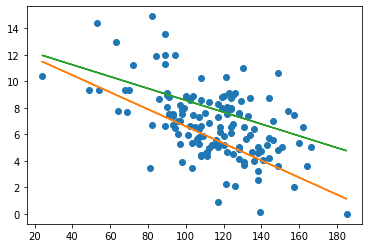

In [20]:
plt.plot(noUS['Price'], noUS['Sales'], 'o')
plt.plot(noUS['Price'], 13.03079275461576-0.0643*noUS['Price'])
plt.plot(noUS['Price'], 13.03079275461576-0.044700000000000004*noUS['Price'])

In [21]:
yesUS = df_new.loc[df_new['US'] == 1]

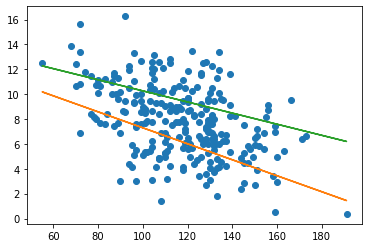

In [22]:
plt.plot(yesUS['Price'], yesUS['Sales'], 'o')
plt.plot(yesUS['Price'], 13.03079275461576-0.0643*yesUS['Price']+0.69392)
plt.plot(yesUS['Price'], 13.03079275461576-0.044700000000000004*yesUS['Price']+1.70528)

The two plots represent the two possibilities of US values. In both plots, many of the data points are points are outside of the 95% confidence intervals. So, there are many outliers. There are a few points, such as the two points at bottom right corners that could be high leverage points.